In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
from scipy.interpolate import interp1d
from scipy.io import readsav

import re

from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
import astropy 

from matplotlib.pylab import *
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import NullFormatter

rcParams['figure.figsize'] = (10,8)
rcParams['font.size'] = 22

import sys
sys.path.append('/Users/earnric/Google Drive/ASU/Codes/PythonCode/modules')
import loadfilt as lf
import lymanAbs as lyA

import os
import subprocess
import glob
import gc

In [2]:
def log_formatter(x,pos):
    return format(np.log10(x), '.0f')
logfmt  = FuncFormatter(log_formatter)

def log_GHzFormatter(x,pos):
    return format(np.log10(x)-9.0, '.0f')
logGHzfmt  = FuncFormatter(log_GHzFormatter)

def GHzFormatter(x,pos):
    return format(x/1e9, '.2e')
GHzfmt  = FuncFormatter(GHzFormatter)

def div_formatter(x,pos):
    return format(x/1000, '.1f')
divfmt  = FuncFormatter(div_formatter)

nullfmt = NullFormatter()
labelsize = 24

In [3]:
# Setup the cosmology used in the runs
# This provides comoving distance, lumin distance, etc... 
# THis is Seth's cosmology
cosmo = FlatLambdaCDM(H0=73.2, Om0=0.24, Ob0=0.0449,name='myCosmo')

In [4]:
cosmo.luminosity_distance(z=1.0)
# Matches Ned's calc: The luminosity distance DL is 6560.5 Mpc or 21.398 Gly. 

<Quantity 6560.467651039068 Mpc>

In [5]:
import importlib
importlib.reload(lyA)

<module 'lymanAbs' from '/Users/earnric/Google Drive/ASU/Codes/PythonCode/modules/lymanAbs.py'>

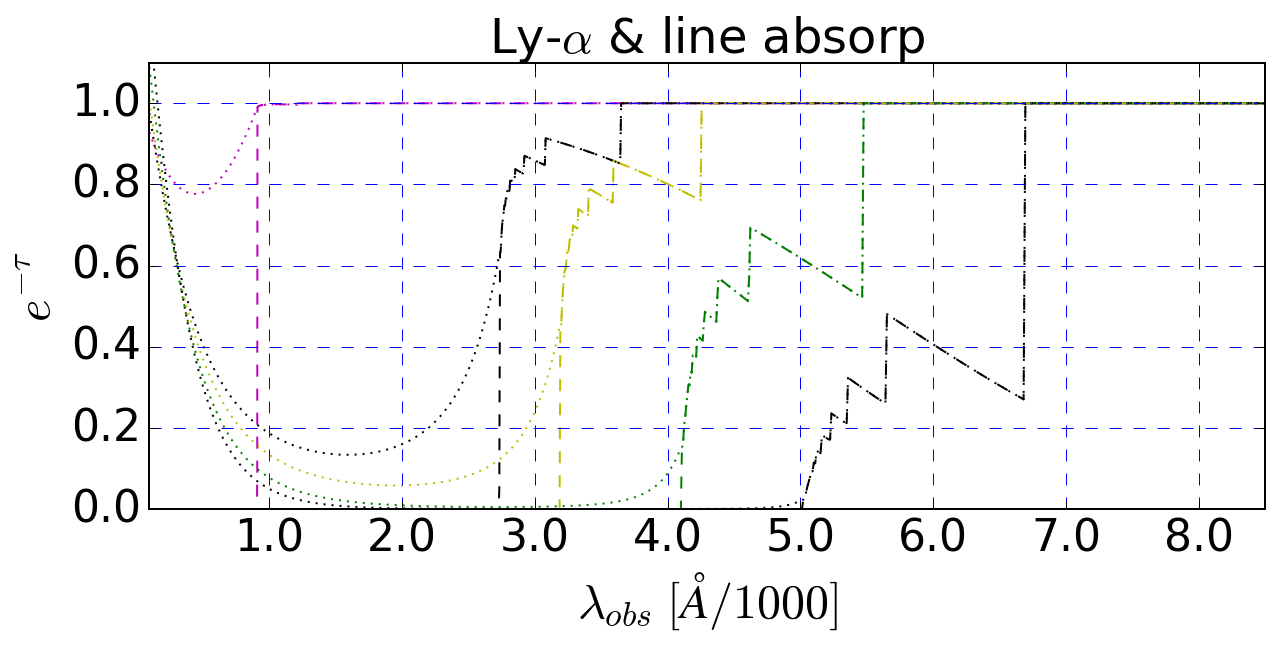

In [43]:
fig = plt.figure(figsize=(10,4))
ax = plt.axes()
lamRange = np.logspace(1.0,5.7,5500)
ax.plot(lamRange,lyA.lyTauC(0.0)(lamRange),'m--',
        lamRange,lyA.lyTauC(2.0)(lamRange),'k--',
        lamRange,lyA.lyTauC(2.5)(lamRange),'y--',
        lamRange,lyA.lyTauC(3.5)(lamRange),'g--',
        lamRange,lyA.lyTauC(4.5)(lamRange),'k--')
ax.plot(lamRange,lyA.lyTau(0.0)(lamRange),'m:',
        lamRange,lyA.lyTau(2.0)(lamRange),'k:',
        lamRange,lyA.lyTau(2.5)(lamRange),'y:',
        lamRange,lyA.lyTau(3.5)(lamRange),'g:',
        lamRange,lyA.lyTau(4.5)(lamRange),'k:')
ax.set_xlim([100,8500])
ax.set_ylim([1e-9,1.1])
#ax.set_yscale('log')
ax.set_ylabel(r'$e^{-\tau}$', size=labelsize)
ax.set_xlabel(r'$\lambda_{obs}\; [\AA/1000]$', size=labelsize)
ax.grid(b=True, which='major', color='b', linestyle='--')
ax.xaxis.set_major_formatter(divfmt)
ax.set_title(r'Ly-$\alpha$ & line absorp',size=labelsize)


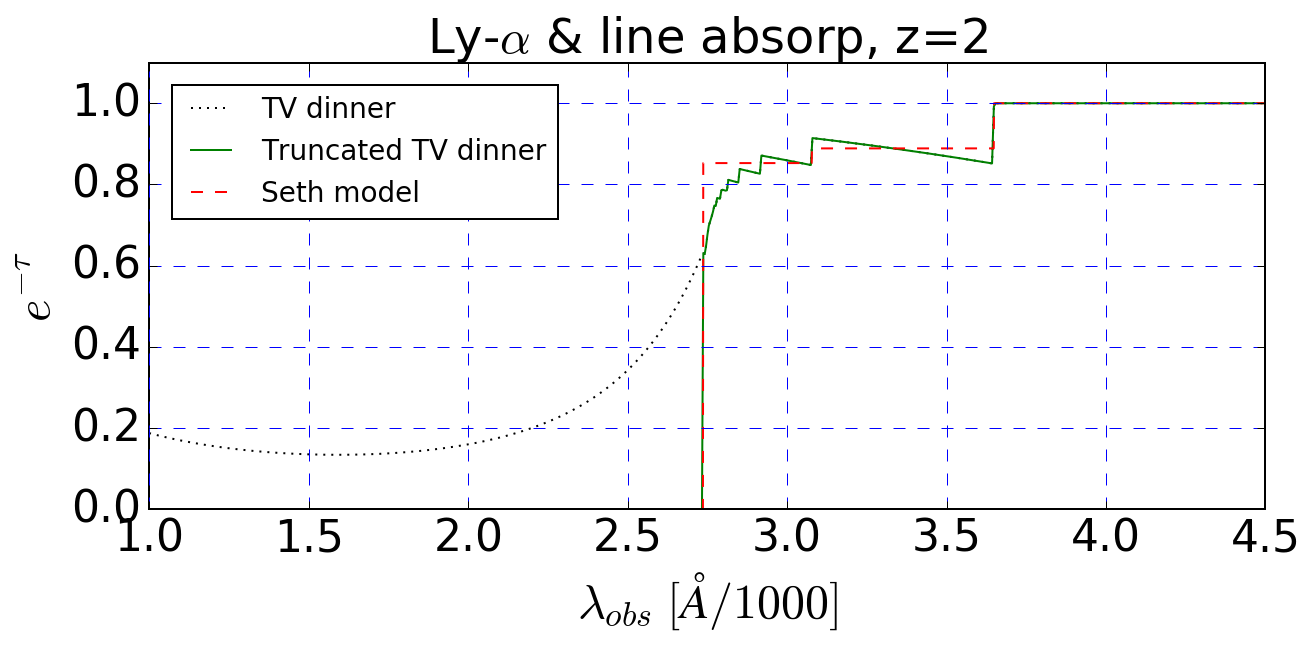

In [45]:
sethZ2IGMabs = np.loadtxt("./igm_test_z2.txt")

fig = plt.figure(figsize=(10,4))
ax = plt.axes()
lamRange = np.logspace(1.95,5.7,5500)
ax.plot(lamRange,lyA.lyTau(2.0)(lamRange),'k:',
        lamRange,lyA.lyTauC(2.0)(lamRange),'g-',
        sethZ2IGMabs[:,0],sethZ2IGMabs[:,1],'r--')
ax.set_xlim([1000,4500])
ax.set_ylim([1e-9,1.1])
#ax.set_yscale('log')
ax.set_ylabel(r'$e^{-\tau}$', size=labelsize)
ax.set_xlabel(r'$\lambda_{obs}\; [\AA/1000]$', size=labelsize)
ax.grid(b=True, which='major', color='b', linestyle='--')
ax.xaxis.set_major_formatter(divfmt)
ax.set_title(r'Ly-$\alpha$ & line absorp, z=2',size=labelsize)
ax.legend(['TV dinner','Truncated TV dinner','Seth model'],
          fontsize=14,loc=(0.02,0.65))

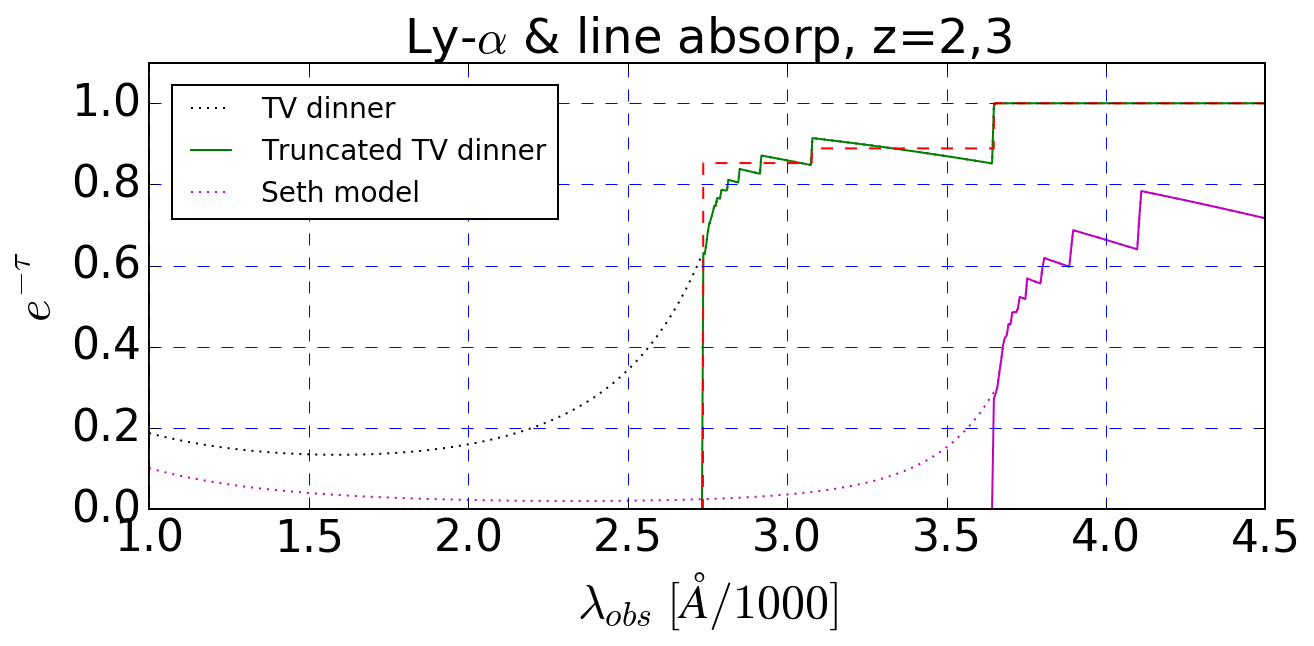

In [7]:
sethZ2IGMabs = np.loadtxt("./igm_test_z2.txt")

fig = plt.figure(figsize=(10,4))
ax = plt.axes()
lamRange = np.logspace(1.95,5.7,5500)
ax.plot(lamRange,lyA.lyTau(2.0)(lamRange),'k:',
        lamRange,lyA.lyTauC(2.0)(lamRange),'g-',
        lamRange,lyA.lyTau(3.0)(lamRange),'m:',
        lamRange,lyA.lyTauC(3.0)(lamRange),'m-',
        sethZ2IGMabs[:,0],sethZ2IGMabs[:,1],'r--')
ax.set_xlim([1000,4500])
ax.set_ylim([1e-9,1.1])
#ax.set_yscale('log')
ax.set_ylabel(r'$e^{-\tau}$', size=labelsize)
ax.set_xlabel(r'$\lambda_{obs}\; [\AA/1000]$', size=labelsize)
ax.grid(b=True, which='major', color='b', linestyle='--')
ax.xaxis.set_major_formatter(divfmt)
ax.set_title(r'Ly-$\alpha$ & line absorp, z=2,3',size=labelsize)
ax.legend(['TV dinner','Truncated TV dinner','Seth model'],
          fontsize=14,loc=(0.02,0.65))